# Implement K-Means Algorithm

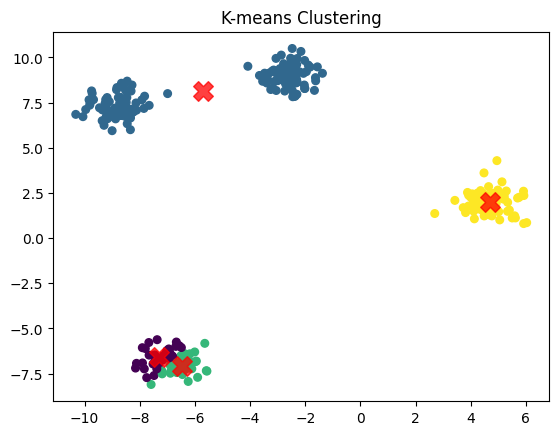

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_centroids(X, k):
    """Randomly initialize k centroids from the dataset X."""
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def compute_distances(X, centroids):
    """Compute the distance from each point to each centroid."""
    distances = np.zeros((X.shape[0], len(centroids)))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(X - centroid, axis=1)
    return distances

def assign_clusters(distances):
    """Assign each point to the nearest centroid."""
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """Update the centroids as the mean of assigned points."""
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        new_centroids[i] = X[labels == i].mean(axis=0)
    return new_centroids

def has_converged(old_centroids, new_centroids, tol=1e-4):
    """Check if centroids have stopped changing."""
    return np.all(np.linalg.norm(old_centroids - new_centroids, axis=1) < tol)

def kmeans(X, k, max_iters=100):
    """K-means clustering algorithm."""
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        distances = compute_distances(X, centroids)
        labels = assign_clusters(distances)
        new_centroids = update_centroids(X, labels, k)
        if has_converged(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

# Example usage
if __name__ == "__main__":
    # Generate synthetic data
    from sklearn.datasets import make_blobs
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

    k = 4
    labels, centroids = kmeans(X, k)

    # Plot the results
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
    plt.title("K-means Clustering")
    plt.show()
